In [146]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
df = pd.read_csv('train.csv')

<Figure size 24000x12000 with 0 Axes>

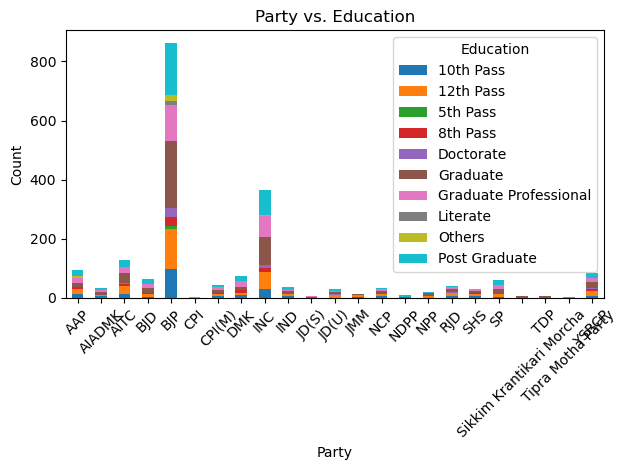

In [148]:
# Group the dataframe by Party and Education and count the occurrences
grouped = df.groupby(['Party', 'Education']).size().unstack(fill_value=0)

# Plot the grouped data
plt.figure(figsize=(240, 120))
grouped.plot(kind='bar', stacked=True)
plt.title('Party vs. Education')
plt.xlabel('Party')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Education')
plt.tight_layout()
plt.show()

<Figure size 24000x12000 with 0 Axes>

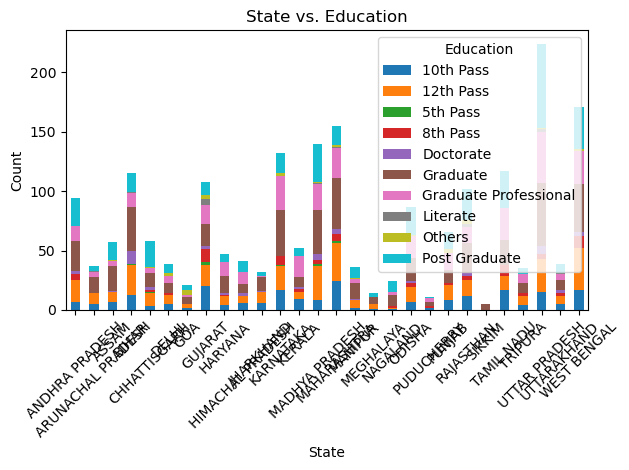

In [149]:
# Group the dataframe by Party and Education and count the occurrences
grouped = df.groupby(['state', 'Education']).size().unstack(fill_value=0)

# Plot the grouped data
plt.figure(figsize=(240, 120))
grouped.plot(kind='bar', stacked=True)
plt.title('State vs. Education')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Education')
plt.tight_layout()
plt.show()

In [150]:
def convert_assets_liabilities(value):
    if '+' in value:
        number, unit = value.split(' ')
        number = float(number.replace(',', ''))
        if unit == 'Crore+':
            return float(number * 10000000.0)
        elif unit == 'Lac+':
            return float(number * 100000.0)
        elif unit == 'Thou+':
            return float(number * 1000.0)
        elif unit == 'Hund+':
            return float(number * 100.0)
        else:
            return float(number)
    else:
        return float(value.replace(',', ''))

def convert_constituency(value):
    if '(SC)' in value:
        return 'SC'
    elif '(ST)' in value:
        return 'ST'
    else:
        return 'GEN'

df['Total Assets'] = df['Total Assets'].apply(convert_assets_liabilities)
df['Liabilities'] = df['Liabilities'].apply(convert_assets_liabilities)
df['Constituency ∇'] = df['Constituency ∇'].apply(convert_constituency)


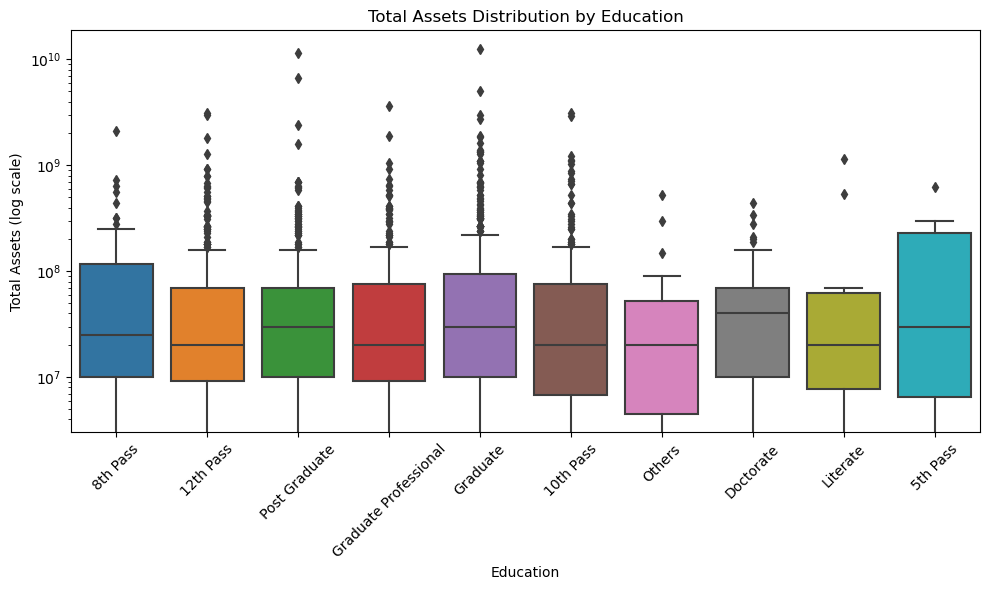

In [151]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Total Assets', data=df)
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.title('Total Assets Distribution by Education')
plt.xlabel('Education')
plt.ylabel('Total Assets (log scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

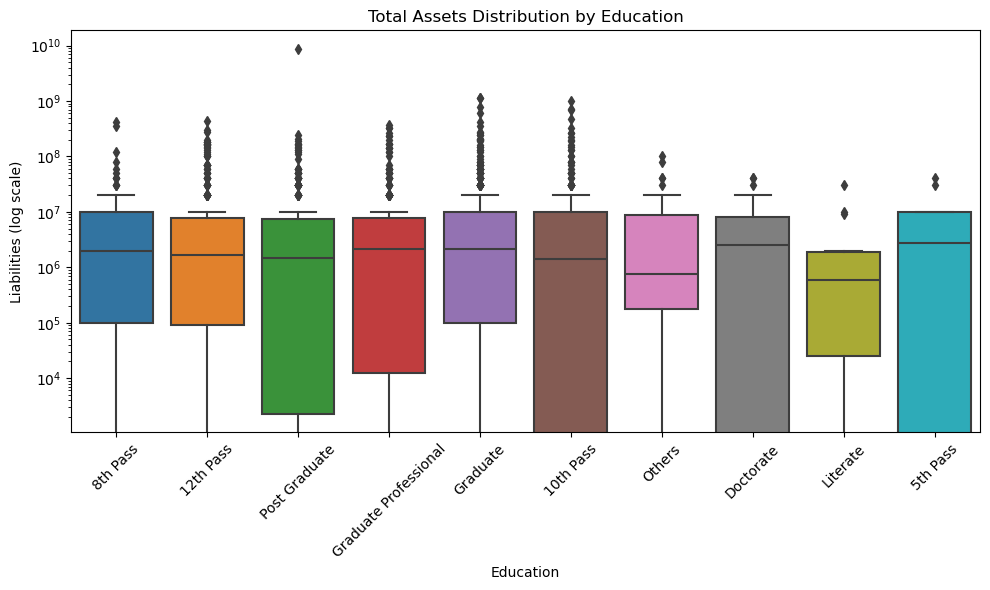

In [152]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Liabilities', data=df)
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.title('Total Assets Distribution by Education')
plt.xlabel('Education')
plt.ylabel('Liabilities (log scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 24000x12000 with 0 Axes>

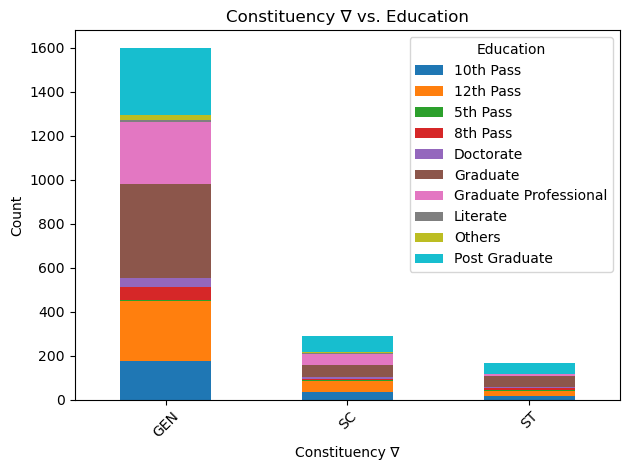

In [153]:
grouped = df.groupby(['Constituency ∇', 'Education']).size().unstack(fill_value=0)

# Plot the grouped data
plt.figure(figsize=(240, 120))
grouped.plot(kind='bar', stacked=True)
plt.title('Constituency ∇ vs. Education')
plt.xlabel('Constituency ∇')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Education')
plt.tight_layout()
plt.show()

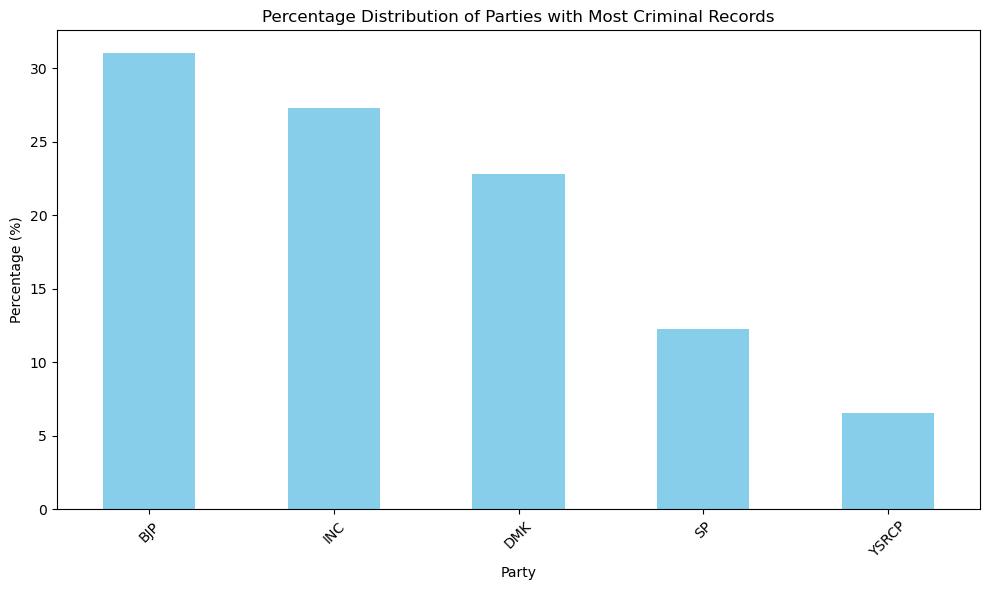

In [154]:
party_criminal_cases = df.groupby('Party')['Criminal Case'].sum()

# Get the parties with the most criminal cases
top_parties = party_criminal_cases.nlargest(5)  # Adjust the number as needed

# Calculate the percentage distribution
percentage_distribution = (top_parties / top_parties.sum()) * 100

# Plotting
plt.figure(figsize=(10, 6))
percentage_distribution.plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of Parties with Most Criminal Records')
plt.xlabel('Party')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

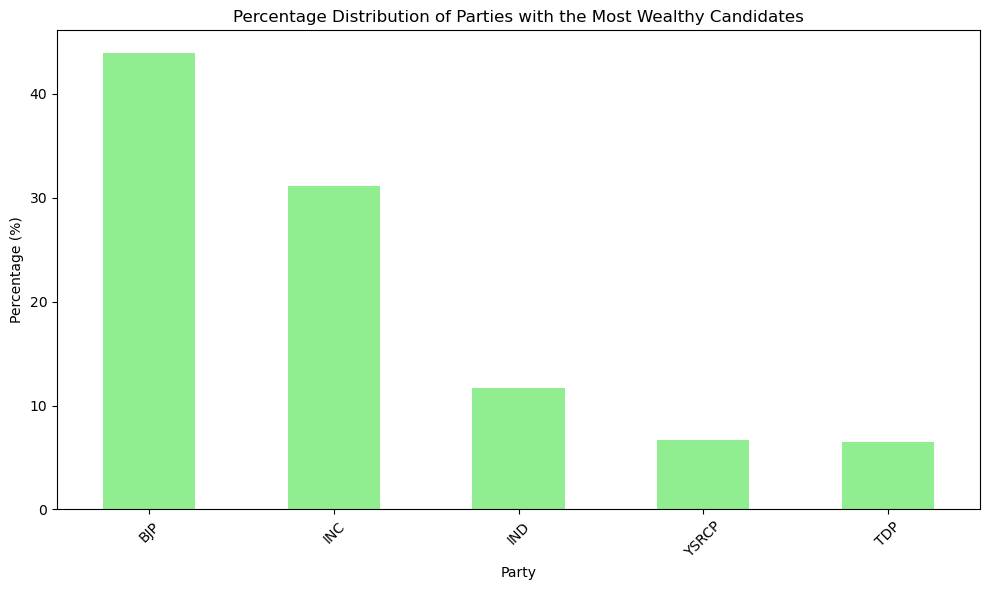

In [155]:
df['Wealth'] = df['Total Assets'] - df['Liabilities']

# Group by 'Party' and calculate the sum of 'Wealth' for each party
party_wealth = df.groupby('Party')['Wealth'].sum()

# Get the parties with the most wealth
top_wealthy_parties = party_wealth.nlargest(5)  # Adjust the number as needed

# Calculate the percentage distribution
percentage_distribution_wealth = (top_wealthy_parties / top_wealthy_parties.sum()) * 100

# Plotting
plt.figure(figsize=(10, 6))
percentage_distribution_wealth.plot(kind='bar', color='lightgreen')
plt.title('Percentage Distribution of Parties with the Most Wealthy Candidates')
plt.xlabel('Party')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [156]:
df = df.drop(columns=['ID', 'Candidate', 'Wealth'])
df = pd.get_dummies(df, columns=['Party', 'state', 'Constituency ∇'])

# df['Net']= df['Total Assets'] - df['Liabilities']

df.head(1000)

,Criminal Case,Total Assets,Liabilities,Education,Party_AAP,Party_AIADMK,Party_AITC,Party_BJD,Party_BJP,Party_CPI,...,state_RAJASTHAN,state_SIKKIM,state_TAMIL NADU,state_TRIPURA,state_UTTAR PRADESH,state_UTTARAKHAND,state_WEST BENGAL,Constituency ∇_GEN,Constituency ∇_SC,Constituency ∇_ST
0,4,2.110000e+09,20000000.0,8th Pass,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,0,1.000000e+07,0.0,12th Pass,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,0,7.000000e+07,2200000.0,Post Graduate,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,9.000000e+07,2400000.0,Post Graduate,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,2,2.000000e+07,6100000.0,8th Pass,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,2.000000e+07,300000.0,Post Graduate,False,False,True,False,False,False,...,False,False,False,False,False,False,True,True,False,False
996,0,6.000000e+07,10000000.0,Post Graduate,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
997,1,1.500000e+08,25000.0,Graduate Professional,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
998,0,2.000000e+07,5900000.0,Post Graduate,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False


In [157]:
has_nan = df.isna().any().any()

print(has_nan)

False


In [158]:
y = df['Education']
X = df.drop(columns=['Education'])

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
clf = BernoulliNB(alpha=1.0, binarize=0.1,fit_prior=True,class_prior=None)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


0.24271844660194175
                       precision    recall  f1-score   support

            10th Pass       0.15      0.08      0.11        49
            12th Pass       0.12      0.06      0.08        67
             5th Pass       0.00      0.00      0.00         1
             8th Pass       0.00      0.00      0.00        20
            Doctorate       0.00      0.00      0.00        14
             Graduate       0.28      0.47      0.36       108
Graduate Professional       0.19      0.20      0.20        66
             Literate       0.00      0.00      0.00         3
               Others       0.00      0.00      0.00         4
        Post Graduate       0.26      0.35      0.30        80

             accuracy                           0.24       412
            macro avg       0.10      0.12      0.10       412
         weighted avg       0.19      0.24      0.21       412



In [161]:
test = pd.read_csv('test.csv')

test['Total Assets'] = test['Total Assets'].apply(convert_assets_liabilities)
test['Liabilities'] = test['Liabilities'].apply(convert_assets_liabilities)
test['Constituency ∇'] = test['Constituency ∇'].apply(convert_constituency)

test = test.drop(columns=['ID', 'Candidate'])
test = pd.get_dummies(test, columns=['Party', 'state', 'Constituency ∇'])

y_pred = clf.predict(test)

df_result = pd.DataFrame({'ID': np.arange(len(y_pred)), 'Education': y_pred})

df_result.to_csv('output.csv', index=False)

print("CSV file saved successfully.")

CSV file saved successfully.
